In [2]:
# Cargar librerías importantes
library(dplyr)
# library(ggplot2)
library(readr)
library(ggplot2)

In [3]:
# Cargar conjunto de datos, que es un archivo csv
info_reservaciones <- read.csv("./reserv_data/reservations.csv")

In [4]:
# Número de filas de la tabla
nrow(info_reservaciones)

[1] 36275

In [5]:
# Cambiar el ID de la reservación, tal que este esté libre de los primeros tres caracteres y sea numérico
info_reservaciones$Booking_ID <- as.numeric(substr(info_reservaciones$Booking_ID, 4, nchar(info_reservaciones$Booking_ID)))

In [6]:
# Obtener la reservación y su estado
estados_reserv <- info_reservaciones[,c("Booking_ID","booking_status")]

In [7]:
# Quitar columnas que no contengan datos de tipo numérico, pues el análisis se hará con
# el algoritmo de k-vecinos, que, en primera instancia, solo trabaja con datos numéricos.
# A su vez, se debe mantener el ID de la reservación
info_reservaciones <- info_reservaciones[, sapply(info_reservaciones, is.numeric)]
# Se agrega la columna que describe el estado de la reservación, que puede ser cancelada o no cancelada.
info_reservaciones <- left_join(info_reservaciones, estados_reserv, by = "Booking_ID")
head(info_reservaciones)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>
1,1,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,Not_Canceled
2,2,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,Not_Canceled
3,3,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,Canceled
4,4,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,Canceled
5,5,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,Canceled
6,6,2,0,0,2,0,346,2018,9,13,0,0,0,115.00,1,Canceled


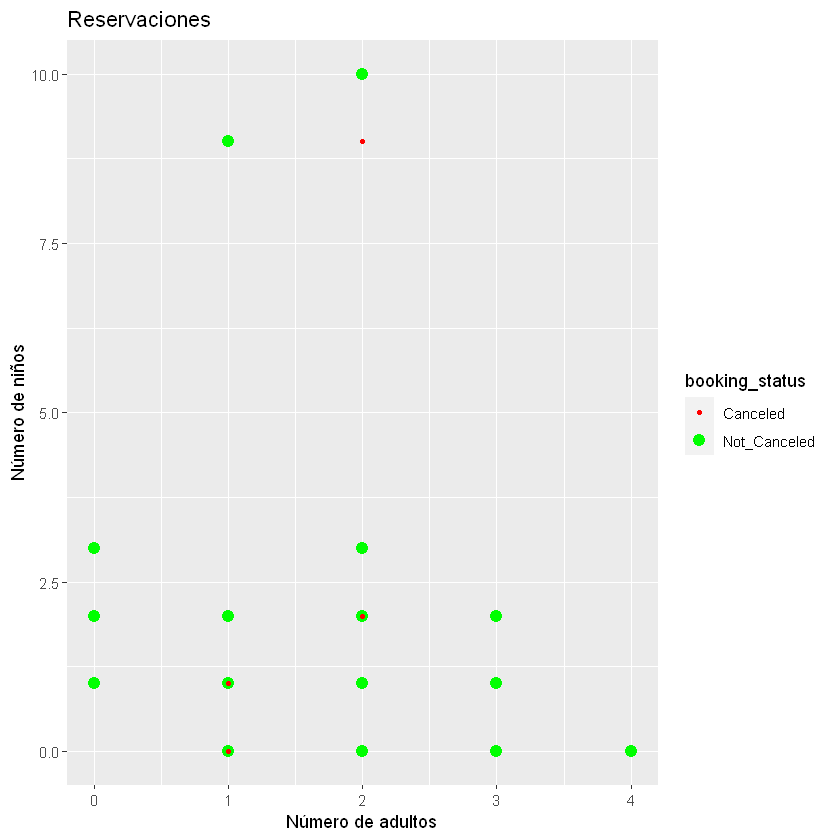

In [8]:
# Crea una gráfica que muestre los datos como puntos en un plano cartesiano, tomando las variables
# no_of_adults y no_of_children como ejes x e y, respectivamente.
# La variable booking_status indica el color de los puntos, donde los puntos rojos indican que la reservación
# fue cancelada y los puntos verdes indican que la reservación no fue cancelada.

ggplot(info_reservaciones, aes(x = no_of_adults, y = no_of_children, color = booking_status, size = booking_status)) +
    geom_point() +
    scale_color_manual(values = c("red", "green")) +
    scale_size_manual(values = c(1, 3)) +
    labs(title = "Reservaciones", x = "Número de adultos", y = "Número de niños")

In [9]:
# Se declara la función para normalizar los datos, que permite deshacerse de diferencias
# de magnitud entre los datos y nos permite graficarlos en un mismo plano.
normalizar <-
function(x) {
    (x -min(x))/(max(x)-min(x))
}

In [10]:
# Correr la función para normalizar los datos, desde la segunda columna hasta la penúltima, sólo en las columnas numéricas.
# pues la primera columna es el ID de la reservación y la última es el estado de la reservación.
info_reservaciones_norm <- as.data.frame(lapply(info_reservaciones[,2:(ncol(info_reservaciones)-2)], normalizar))
head(info_reservaciones_norm)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50,0,0.1428571,0.11764706,0,0.505643341,0,0.81818182,0.03333333,0,0,0,0.1203704
2,0.50,0,0.2857143,0.17647059,0,0.011286682,1,0.90909091,0.16666667,0,0,0,0.1975556
3,0.25,0,0.2857143,0.05882353,0,0.002257336,1,0.09090909,0.90000000,0,0,0,0.1111111
4,0.50,0,0.0000000,0.11764706,0,0.476297968,1,0.36363636,0.63333333,0,0,0,0.1851852
5,0.50,0,0.1428571,0.05882353,0,0.108352144,1,0.27272727,0.33333333,0,0,0,0.1750000
6,0.50,0,0.0000000,0.11764706,0,0.781038375,1,0.72727273,0.40000000,0,0,0,0.2129630


In [11]:
# Obtener una muestra aleatoria de 80% de los datos para entrenamiento
datos_al_azar <- sample(1:nrow(info_reservaciones_norm), 0.8 * nrow(info_reservaciones_norm)) 
muestra_entrenamiento <- info_reservaciones_norm[datos_al_azar, ]
# Obtener una muestra aleatoria de 20% de los datos para prueba
muestra_prueba <- info_reservaciones_norm[-datos_al_azar, ]
head(muestra_entrenamiento)
head(muestra_prueba)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21783,0.5,0.0,0.1428571,0.11764706,0,0.011286682,0,0.81818182,0.60000000,0,0,0,0.1666667
25635,0.5,0.0,0.1428571,0.11764706,0,0.167042889,1,0.09090909,0.46666667,0,0,0,0.1074074
2704,0.5,0.0,0.2857143,0.05882353,0,0.092550790,1,0.18181818,0.40000000,0,0,0,0.1586481
35355,0.5,0.0,0.0000000,0.05882353,0,0.516930023,1,0.72727273,0.06666667,0,0,0,0.1583333
24865,0.5,0.2,0.0000000,0.05882353,0,0.009029345,1,0.54545455,0.46666667,0,0,0,0.4277778
27145,0.5,0.0,0.2857143,0.29411765,0,0.006772009,0,0.72727273,0.30000000,0,0,0,0.2542407


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.5,0,0.2857143,0.17647059,0,0.011286682,1,0.9090909,0.1666667,0,0,0,0.1975556
8,0.5,0,0.1428571,0.17647059,0,0.187358916,1,1.0000000,0.8333333,0,0,0,0.1955741
10,0.5,0,0.0000000,0.29411765,0,0.099322799,1,0.8181818,0.5666667,0,0,0,0.2471111
30,0.5,0,0.0000000,0.11764706,0,0.126410835,0,0.7272727,0.5333333,0,0,0,0.1518519
31,0.5,0,0.1428571,0.05882353,0,0.006772009,0,0.7272727,0.6000000,0,0,0,0.3287037
41,0.5,0,0.0000000,0.23529412,0,0.144469526,1,0.9090909,0.0000000,0,0,0,0.1733333


In [12]:
# Se importa la librería para el algoritmo de k-vecinos
library(class)

In [13]:
# Se declara la función para predecir el estado de la reservación, que se basa en el algoritmo de k-vecinos
# y que recibe como parámetros los datos de entrenamiento, los datos de prueba, el número de vecinos.
predicciones <- knn(muestra_entrenamiento, # Datos de entrenamiento
                    muestra_prueba, # Datos de prueba
                    info_reservaciones[datos_al_azar, 16], # Etiquetas bajo las cuales se clasificarán los datos de entrenamiento
                    k = 3) # Número de vecinos

In [14]:
summary(predicciones)

Canceled Not_Canceled 
        2197         5058

In [15]:
# Se crea una matriz de confusión para ver la precisión del algoritmo
tab <- table(predicciones,info_reservaciones[-datos_al_azar, 16])
tab

              
predicciones   Canceled Not_Canceled
  Canceled         1567          630
  Not_Canceled      856         4202

In [16]:
# En esta función se divide el número de predicciones correctas entre el número total de predicciones, lo que nos dice 
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tab)

[1] 79.51757